In [1]:
from google.colab import files
import pandas as pd

def upload_csv_to_colab():
    # Uploading file
    uploaded = files.upload()

    # Get the filename from the uploaded dictionary
    filename = next(iter(uploaded))

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(filename)

    print(f"File {filename} uploaded successfully!")
    return df


In [2]:
# Call the function to upload the CSV file
df = upload_csv_to_colab()

# Display the first few rows of the DataFrame
df.head()


Saving CTG.csv to CTG.csv
File CTG.csv uploaded successfully!


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [3]:
df=df.drop(columns=['FileName','Date','SegFile','b','e'])

In [4]:
df.isna().sum()


,0
LBE,3
LB,3
AC,3
FM,2
UC,2
ASTV,2
MSTV,2
ALTV,2
MLTV,2
DL,1


In [5]:
# 1. Handling Missing Values
# Impute missing values in numerical columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

df.dropna(subset=['CLASS'], inplace=True)

In [6]:
# Check unique values for potential target columns
print(df['CLASS'].unique())
print(df['NSP'].unique())


[ 9.  6.  2.  8. 10.  7.  1.  3.  5.  4.]
[2. 1. 3.]


#Q3

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Select features and target
features = ['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
             'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros',
             'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C',
             'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'NSP']
X = df[features]  # Features
y = df['CLASS']   # Target

# Convert the target variable to an integer type if necessary
y = y.astype('int')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Random Forest Classifier:')
print(f'Accuracy on Test Data: {accuracy_test:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))


Random Forest Classifier:
Accuracy on Test Data: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00       112
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        54
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        46

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



#Q2

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error  # For MAPE calculation

# Train the model on training data and make predictions
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Convert predictions to probabilities for MAPE and R^2 calculation
# Note: For classification, use `predict_proba` method
y_train_prob = clf.predict_proba(X_train_scaled)[:, 1]  # Probabilities for the positive class
y_test_prob = clf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Convert true labels to numerical values (they are in float64 already..)
y_train_numeric = y_train.astype('float64')
y_test_numeric = y_test.astype('float64')

# Calculate metrics for training data
mse_train = mean_squared_error(y_train_numeric, y_train_prob)
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((y_train_numeric - y_train_prob) / y_train_numeric)) * 100
r2_train = r2_score(y_train_numeric, y_train_prob)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test_numeric, y_test_prob)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test_numeric - y_test_prob) / y_test_numeric)) * 100
r2_test = r2_score(y_test_numeric, y_test_prob)

print('Metrics for Training Data:')
print(f'MSE: {mse_train:.4f}')
print(f'RMSE: {rmse_train:.4f}')
print(f'MAPE: {mape_train:.2f}%')
print(f'R2 Score: {r2_train:.4f}')

print('\nMetrics for Testing Data:')
print(f'MSE: {mse_test:.4f}')
print(f'RMSE: {rmse_test:.4f}')
print(f'MAPE: {mape_test:.2f}%')
print(f'R2 Score: {r2_test:.4f}')


Metrics for Training Data:
MSE: 28.5139
RMSE: 5.3398
MAPE: 86.30%
R2 Score: -2.1321

Metrics for Testing Data:
MSE: 29.1460
RMSE: 5.3987
MAPE: 86.81%
R2 Score: -2.1310


Q1

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Select a subset of features
features = ['LBE', 'LB', 'AC', 'FM', 'UC']  #  subset of features
X = df[features]  # Features
y = df['CLASS']   # Target

# Convert the target variable to an integer type if necessary
y = y.astype('int')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Random Forest Classifier:')
print(f'Accuracy on Test Data: {accuracy_test:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))


Random Forest Classifier:
Accuracy on Test Data: 0.63
Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.61      0.58        77
           2       0.74      0.87      0.80       112
           3       0.00      0.00      0.00        10
           4       0.73      0.40      0.52        20
           5       0.44      0.18      0.26        22
           6       0.66      0.62      0.64        56
           7       0.63      0.57      0.60        54
           8       0.60      0.63      0.62        19
           9       0.37      0.70      0.48        10
          10       0.65      0.57      0.60        46

    accuracy                           0.63       426
   macro avg       0.54      0.52      0.51       426
weighted avg       0.62      0.63      0.62       426



#Q2

In [12]:


# Select features and target
features = ['LBE', 'LB', 'AC', 'FM', 'UC']  # Example subset of features
X = df[features]  # Features
y = df['CLASS']   # Target

# Convert the target variable to an integer type
y = y.astype('int')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train_scaled, y_train)

# Predict probabilities on the test data
y_train_prob = clf.predict_proba(X_train_scaled)[:, 1]
y_test_prob = clf.predict_proba(X_test_scaled)[:, 1]

# Convert the true labels to numerical values (AlReady in float64..)
y_train_numeric = y_train.astype('float64')
y_test_numeric = y_test.astype('float64')

# Calculate metrics for training data
mse_train = mean_squared_error(y_train_numeric, y_train_prob)
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((y_train_numeric - y_train_prob) / y_train_numeric)) * 100
r2_train = r2_score(y_train_numeric, y_train_prob)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test_numeric, y_test_prob)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test_numeric - y_test_prob) / y_test_numeric)) * 100
r2_test = r2_score(y_test_numeric, y_test_prob)

print('Metrics for Training Data:')
print(f'MSE: {mse_train:.4f}')
print(f'RMSE: {rmse_train:.4f}')
print(f'MAPE: {mape_train:.2f}%')
print(f'R2 Score: {r2_train:.4f}')

print('\nMetrics for Testing Data:')
print(f'MSE: {mse_test:.4f}')
print(f'RMSE: {rmse_test:.4f}')
print(f'MAPE: {mape_test:.2f}%')
print(f'R2 Score: {r2_test:.4f}')

# Additional classification metrics
print('\nClassification Report for Test Data:')
print(classification_report(y_test, clf.predict(X_test_scaled)))


Metrics for Training Data:
MSE: 28.2407
RMSE: 5.3142
MAPE: 87.31%
R2 Score: -2.1021

Metrics for Testing Data:
MSE: 28.6320
RMSE: 5.3509
MAPE: 88.84%
R2 Score: -2.0758

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.55      0.61      0.58        77
           2       0.74      0.87      0.80       112
           3       0.00      0.00      0.00        10
           4       0.73      0.40      0.52        20
           5       0.44      0.18      0.26        22
           6       0.66      0.62      0.64        56
           7       0.63      0.57      0.60        54
           8       0.60      0.63      0.62        19
           9       0.37      0.70      0.48        10
          10       0.65      0.57      0.60        46

    accuracy                           0.63       426
   macro avg       0.54      0.52      0.51       426
weighted avg       0.62      0.63      0.62       426



#Q4

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select features and target
features = ['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
             'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros',
             'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C',
             'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'NSP']
X = df[features]  # Features
y = df['CLASS']   # Target

# Convert the target variable to an integer type
y = y.astype('int')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Random Forest Classifier:')
print(f'Accuracy on Test Data: {accuracy_test:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Perform K-means clustering
# Use features for clustering, ignoring the target variable
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X_train_scaled)

# Cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print('\nK-means Clustering:')
print(f'Cluster Centers:\n{cluster_centers}')





Random Forest Classifier:
Accuracy on Test Data: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00       112
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        54
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        46

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


K-means Clustering:
Cluster Centers:
[[ 2.62143155e-01  2.62143155e-01 -1.02029232e-01 -1.32849128e-01
  -2.19701499e-01  1.94832336e-01 -4.94419776e-01  2.7363477

#Q5

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



# Select features and target
features = ['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
             'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros',
             'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C',
             'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'NSP']
X = df[features]  # Features
y = df['CLASS']   # Target

# Convert the target variable to an integer type
y = y.astype('int')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Random Forest Classifier:')
print(f'Accuracy on Test Data: {accuracy_test:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)

# Calculate clustering metrics
silhouette_avg = silhouette_score(X_train_scaled, kmeans.labels_)
calinski_harabasz_avg = calinski_harabasz_score(X_train_scaled, kmeans.labels_)
davies_bouldin_avg = davies_bouldin_score(X_train_scaled, kmeans.labels_)

print('\nClustering Metrics:')
print(f'Silhouette Score: {silhouette_avg:.4f}')
print(f'Calinski-Harabasz Score: {calinski_harabasz_avg:.4f}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg:.4f}')


Random Forest Classifier:
Accuracy on Test Data: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00       112
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        56
           7       1.00      1.00      1.00        54
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        46

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Clustering Metrics:
Silhouette Score: 0.1619
Calinski-Harabasz Score: 281.9981
Davies-Bouldin Index: 2.2812


#Q6

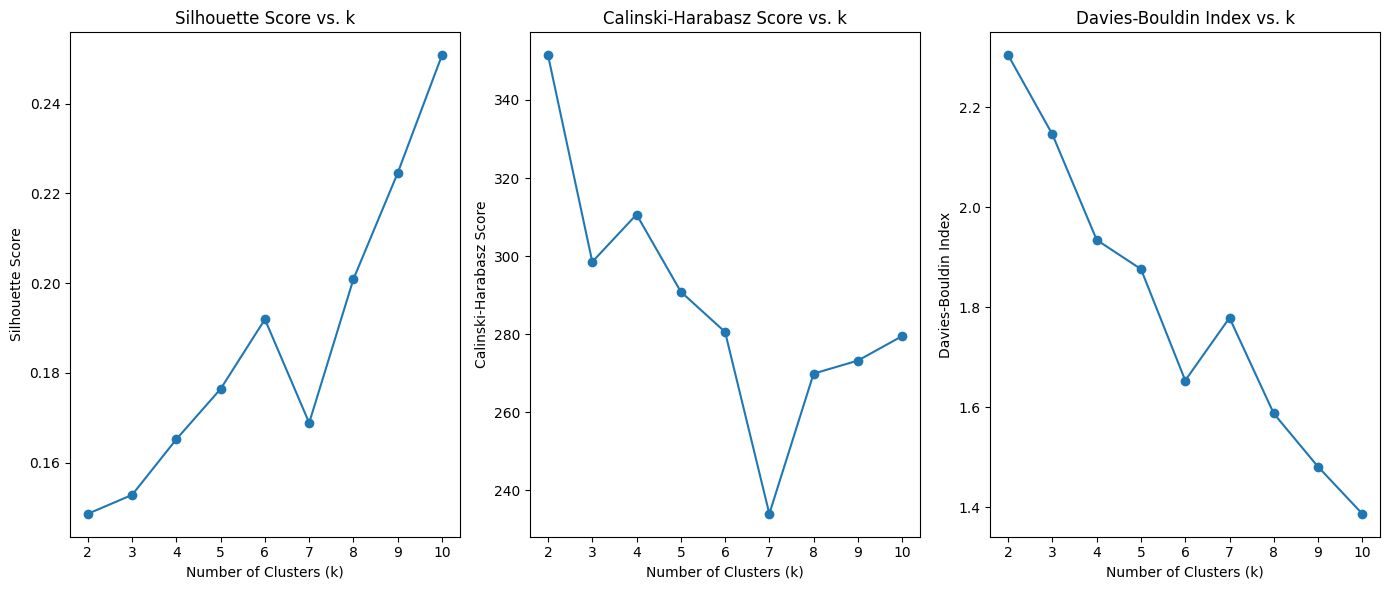

In [16]:


# Select features and target
features = ['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
             'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros',
             'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C',
             'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'NSP']
X = df[features]  # Features

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define range of k values
k_values = range(2, 11)

# Initialize lists to store metrics
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Perform K-means clustering for each k and calculate metrics
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    labels = kmeans.labels_

    silhouette_avg = silhouette_score(X_scaled, labels)
    calinski_harabasz_avg = calinski_harabasz_score(X_scaled, labels)
    davies_bouldin_avg = davies_bouldin_score(X_scaled, labels)

    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(calinski_harabasz_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Plot metrics against k values
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


#Q7

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

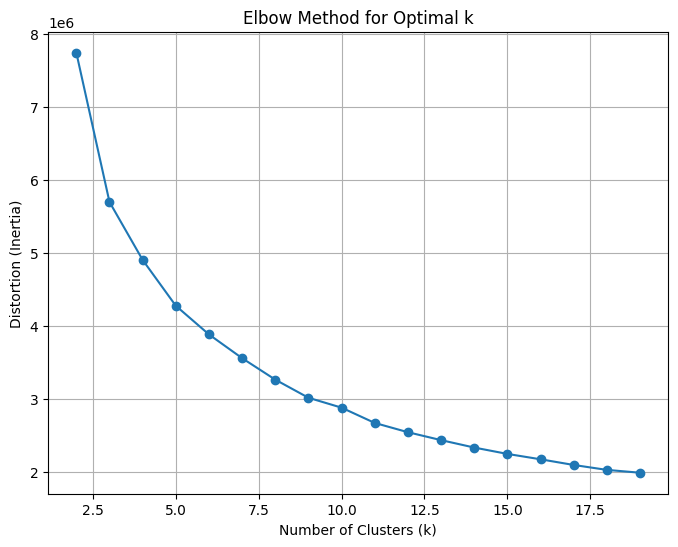

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Initialize an empty list to store the distortions (inertia)
distortions = []

# Compute distortions for different values of k
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)  # Use a random seed for reproducibility
    distortions.append(kmeans.inertia_)

# Plot the distortions for (Elbow Curve)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
